In [54]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

In [2]:
rawfiles = {
#     'childcare': 'raw/la_county_gis_childcare_1566577142572.geojson',
#     'bikeways': 'raw/la_city_bikeways.geojson',
    'parks': 'raw/la_city_parks_1566703413127.geojson',
    'schools': 'raw/lausd_schools_boundaries_1566703408821.geojson',
    'private_schools': 'raw/la_county_private_school_parcels.geojson'
}

In [3]:
def reproject(i, o, c = 3310):
    return f'ogr2ogr processed/{o}_{c}.geojson -t_srs "EPSG:3310" {i}'

In [4]:
for r in rawfiles:
    s = reproject(rawfiles[r], r)
    print(s)
    !$s

ogr2ogr processed/parks_3310.geojson -t_srs "EPSG:3310" raw/la_city_parks_1566703413127.geojson
ogr2ogr processed/schools_3310.geojson -t_srs "EPSG:3310" raw/lausd_schools_boundaries_1566703408821.geojson
ogr2ogr processed/private_schools_3310.geojson -t_srs "EPSG:3310" raw/la_county_private_school_parcels.geojson


### Dataframes from city, county spatial files

In [5]:
alldata = pd.concat([gpd.read_file(f'processed/{r}_3310.geojson') for r in rawfiles])[['geometry']]

/Users/mhustiles/.virtualenvs/twitter/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [6]:
alldata.crs

{'init': 'epsg:3310'}

In [7]:
alldata.head()

,geometry
0,POLYGON ((124885.9867226011 -421713.5765863084...
1,(POLYGON ((128567.9178454922 -428434.105201999...
2,POLYGON ((162384.0991809355 -437613.7844756516...
3,POLYGON ((158717.0126017709 -439777.0173215019...
4,"POLYGON ((158999.167633865 -473912.9987138188,..."


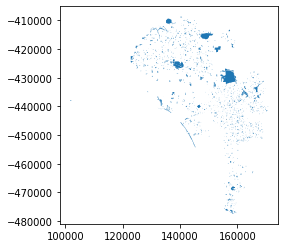

In [8]:
alldata.plot()

In [9]:
# bikes = gpd.read_file("raw/la_city_bikeways.geojson")

# boundary = gpd.read_file("/Users/mhustiles/Desktop/github/data/la-city-homeless-buffer-maps/data/la_city_boundary_3310.geojson")

# parks = gpd.read_file("processed/parks_3310.geojson")

# childcare = gpd.read_file("raw/la_county_gis_childcare_1566577142572.geojson")
                      
# schools = gpd.read_file("processed/schools_3310.geojson")

In [10]:
# parks.head()

In [11]:
# parks.crs

In [12]:
# schools.head()

### Apply 500-foot buffer in meters (152.4)

In [13]:
# parks_buffer = gpd.GeoDataFrame({'geometry': parks.buffer(152.4)})

In [14]:
# schools_buffer = gpd.GeoDataFrame({'geometry': schools.buffer(152.4)})

In [15]:
# parks['geometry'].plot()

In [16]:
# parks_buffer.plot()

In [17]:
# len(parks)

In [18]:
# len(schools)

In [19]:
# together = pd.concat([gdf[['geometry']] for gdf in [schools_buffer, parks_buffer]])

In [20]:
alldata['buffer'] = alldata.buffer(152.4)

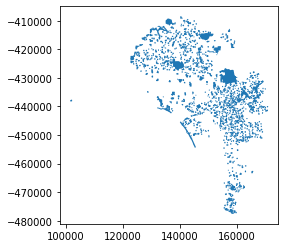

In [21]:
gpd.GeoSeries(alldata['buffer']).plot()

In [22]:
alldata['dummy'] = 'abc'

In [23]:
# together['dummydata'] = 0

In [24]:
alldata.head()

,geometry,buffer,dummy
0,POLYGON ((124885.9867226011 -421713.5765863084...,"POLYGON ((125038.365064102 -421711.0072290856,...",abc
1,(POLYGON ((128567.9178454922 -428434.105201999...,"POLYGON ((128420.410445384 -428668.6091720833,...",abc
2,POLYGON ((162384.0991809355 -437613.7844756516...,POLYGON ((162525.6889306499 -437670.1591399594...,abc
3,POLYGON ((158717.0126017709 -439777.0173215019...,POLYGON ((158852.4860896791 -439846.8220066884...,abc
4,"POLYGON ((158999.167633865 -473912.9987138188,...",POLYGON ((159103.8158962863 -474062.1286101514...,abc


In [25]:
allbuffers = gpd.GeoDataFrame(alldata[['dummy','buffer']], geometry='buffer').dissolve(by = 'dummy')

In [26]:
allbuffers

,buffer
dummy,
abc,(POLYGON ((155277.2620720536 -475419.603562016...


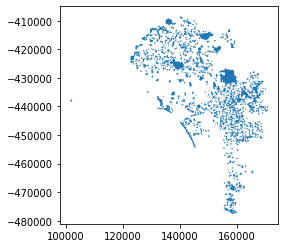

In [27]:
allbuffers.plot()

In [28]:
allbuffers.to_file('combined-buffers.geojson', driver='GeoJSON')

In [29]:
allbuffers.crs

In [30]:
hoods = gpd.read_file('raw/la-county-neighborhoods-current.geojson')

In [31]:
hoods['hood_type'] = hoods['metadata'].apply(dict).apply(lambda x: x['type'])

In [32]:
hoods.to_crs({'init': 'epsg:3310'}, inplace=True)

In [33]:
hoods.head()

,kind,external_id,name,slug,set,metadata,resource_uri,geometry,hood_type
0,L.A. County Neighborhood (Current),acton,Acton,acton-la-county-neighborhood-current,/1.0/boundary-set/la-county-neighborhoods-curr...,"{'sqmi': 39.3391089485, 'type': 'unincorporate...",/1.0/boundary/acton-la-county-neighborhood-cur...,(POLYGON ((164907.1721133307 -384800.650005886...,unincorporated-area
1,L.A. County Neighborhood (Current),adams-normandie,Adams-Normandie,adams-normandie-la-county-neighborhood-current,/1.0/boundary-set/la-county-neighborhoods-curr...,"{'sqmi': 0.805350187789, 'type': 'segment-of-a...",/1.0/boundary/adams-normandie-la-county-neighb...,(POLYGON ((156139.6401248095 -440624.691527145...,segment-of-a-city
2,L.A. County Neighborhood (Current),agoura-hills,Agoura Hills,agoura-hills-la-county-neighborhood-current,/1.0/boundary-set/la-county-neighborhoods-curr...,"{'sqmi': 8.14676029818, 'type': 'standalone-ci...",/1.0/boundary/agoura-hills-la-county-neighborh...,(POLYGON ((114132.3855756644 -426762.559576650...,standalone-city
3,L.A. County Neighborhood (Current),agua-dulce,Agua Dulce,agua-dulce-la-county-neighborhood-current,/1.0/boundary-set/la-county-neighborhoods-curr...,"{'sqmi': 31.4626319451, 'type': 'unincorporate...",/1.0/boundary/agua-dulce-la-county-neighborhoo...,(POLYGON ((160091.8405679099 -382746.646477827...,unincorporated-area
4,L.A. County Neighborhood (Current),alhambra,Alhambra,alhambra-la-county-neighborhood-current,/1.0/boundary-set/la-county-neighborhoods-curr...,"{'sqmi': 7.62381430605, 'type': 'standalone-ci...",/1.0/boundary/alhambra-la-county-neighborhood-...,(POLYGON ((173279.8293033192 -432798.533470016...,standalone-city


In [34]:
lahoods = hoods.loc[hoods.hood_type == 'segment-of-a-city', ['name', 'geometry']]

In [35]:
lahoods.head()

,name,geometry
1,Adams-Normandie,(POLYGON ((156139.6401248095 -440624.691527145...
9,Arleta,(POLYGON ((145361.3096072993 -420096.183241406...
10,Arlington Heights,(POLYGON ((155472.5469032949 -438950.195603739...
13,Atwater Village,(POLYGON ((158739.6492951899 -427752.278756475...
17,Baldwin Hills/Crenshaw,(POLYGON ((151801.1076706515 -442096.112350080...


In [36]:
lahoods.head()

,name,geometry
1,Adams-Normandie,(POLYGON ((156139.6401248095 -440624.691527145...
9,Arleta,(POLYGON ((145361.3096072993 -420096.183241406...
10,Arlington Heights,(POLYGON ((155472.5469032949 -438950.195603739...
13,Atwater Village,(POLYGON ((158739.6492951899 -427752.278756475...
17,Baldwin Hills/Crenshaw,(POLYGON ((151801.1076706515 -442096.112350080...


Puts the buffer shape on each line

In [37]:
lahoods['buffers'] = lahoods['name'].apply(lambda x: allbuffers['buffer'][0])

In [38]:
lahoods.head()

,name,geometry,buffers
1,Adams-Normandie,(POLYGON ((156139.6401248095 -440624.691527145...,(POLYGON ((155277.2620720536 -475419.603562016...
9,Arleta,(POLYGON ((145361.3096072993 -420096.183241406...,(POLYGON ((155277.2620720536 -475419.603562016...
10,Arlington Heights,(POLYGON ((155472.5469032949 -438950.195603739...,(POLYGON ((155277.2620720536 -475419.603562016...
13,Atwater Village,(POLYGON ((158739.6492951899 -427752.278756475...,(POLYGON ((155277.2620720536 -475419.603562016...
17,Baldwin Hills/Crenshaw,(POLYGON ((151801.1076706515 -442096.112350080...,(POLYGON ((155277.2620720536 -475419.603562016...


In [39]:
len(lahoods)

114

In [40]:
lahoods['hits_buffer'] = lahoods.apply(lambda x: x.geometry.intersects(x.buffers), axis = 1)

How many of the lahoods hit the buffer?

In [41]:
lahoods['hits_buffer'].sum()

114

In [42]:
lahoods['intersection'] = lahoods.apply(lambda x: x.geometry.intersection(x.buffers), axis=1)

In [43]:
lahoods.head()

,name,geometry,buffers,hits_buffer,intersection
1,Adams-Normandie,(POLYGON ((156139.6401248095 -440624.691527145...,(POLYGON ((155277.2620720536 -475419.603562016...,True,(POLYGON ((156139.6401248095 -440624.691527145...
9,Arleta,(POLYGON ((145361.3096072993 -420096.183241406...,(POLYGON ((155277.2620720536 -475419.603562016...,True,(POLYGON ((143859.8887858134 -419132.018329077...
10,Arlington Heights,(POLYGON ((155472.5469032949 -438950.195603739...,(POLYGON ((155277.2620720536 -475419.603562016...,True,(POLYGON ((155507.5774555412 -438947.887246884...
13,Atwater Village,(POLYGON ((158739.6492951899 -427752.278756475...,(POLYGON ((155277.2620720536 -475419.603562016...,True,(POLYGON ((158739.6492951899 -427752.278756475...
17,Baldwin Hills/Crenshaw,(POLYGON ((151801.1076706515 -442096.112350080...,(POLYGON ((155277.2620720536 -475419.603562016...,True,(POLYGON ((151900.664113194 -442106.3025537037...


In [44]:
lahoods['hood_area'] = lahoods.geometry.area / 2590000

In [45]:
lahoods['buffer_area'] = lahoods['intersection'].apply(lambda x: x.area / 2590000)

In [46]:
lahoods['pct_of_hood_in_buffer'] = lahoods.buffer_area / lahoods.hood_area

In [47]:
lahoods.sort_values('pct_of_hood_in_buffer', ascending=False)

,name,geometry,buffers,hits_buffer,intersection,hood_area,buffer_area,pct_of_hood_in_buffer
89,Griffith Park,(POLYGON ((156829.1284531329 -427266.164410656...,(POLYGON ((155277.2620720536 -475419.603562016...,True,POLYGON ((156829.1284531329 -427266.1644106563...,5.835412,5.831311,0.999297
92,Hansen Dam,(POLYGON ((150213.0023347829 -414549.544432659...,(POLYGON ((155277.2620720536 -475419.603562016...,True,POLYGON ((150213.0023347829 -414549.5444326596...,1.965736,1.963418,0.998821
200,Sepulveda Basin,(POLYGON ((139744.5472696587 -424348.804661298...,(POLYGON ((155277.2620720536 -475419.603562016...,True,(POLYGON ((139744.5998036747 -424352.089170091...,3.135845,2.993854,0.954720
74,Elysian Park,(POLYGON ((163782.7920108401 -436433.284509371...,(POLYGON ((155277.2620720536 -475419.603562016...,True,(POLYGON ((163782.7920108401 -436433.284509371...,1.643644,1.241710,0.755462
257,Westlake,(POLYGON ((158709.9269350781 -436196.146341535...,(POLYGON ((155277.2620720536 -475419.603562016...,True,(POLYGON ((159580.4575424944 -436520.473373194...,2.717338,1.720385,0.633114
151,Montecito Heights,(POLYGON ((168259.3272685921 -432090.137112584...,(POLYGON ((155277.2620720536 -475419.603562016...,True,(POLYGON ((168259.3272685921 -432090.137112584...,2.410771,1.469158,0.609414
173,Pico-Union,(POLYGON ((157225.9029746909 -438885.587617512...,(POLYGON ((155277.2620720536 -475419.603562016...,True,(POLYGON ((157956.9069593252 -438916.799876119...,1.670386,0.997983,0.597457
93,Harbor City,(POLYGON ((157351.5721386187 -465393.510194905...,(POLYGON ((155277.2620720536 -475419.603562016...,True,(POLYGON ((157519.8512510806 -466783.160752343...,2.577134,1.474208,0.572034
210,South Park,(POLYGON ((161064.6065343088 -444262.830132298...,(POLYGON ((155277.2620720536 -475419.603562016...,True,(POLYGON ((161064.6065343088 -444262.830132298...,1.406809,0.768288,0.546121
249,Watts,(POLYGON ((162293.5748314608 -449790.518718350...,(POLYGON ((155277.2620720536 -475419.603562016...,True,(POLYGON ((162779.8986059015 -449839.276408292...,2.121397,1.143949,0.539243


In [60]:
intersection_gdf = gpd.GeoDataFrame(lahoods[['name','intersection', 'pct_of_hood_in_buffer']], geometry = 'intersection')

In [61]:
intersection_gdf.to_file('buffers-by-hood.geojson', driver='GeoJSON')

In [69]:
export = pd.DataFrame(lahoods[['name','hood_area', 'buffer_area','pct_of_hood_in_buffer']]).sort_values('pct_of_hood_in_buffer', ascending=False)

In [70]:
export.to_csv('hood-breakdown.csv')